**1. Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading and Understanding**

In [3]:
# load teh csv data to a pandas dataframe
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/Merged_Churn_Data.csv")

Saving survival_features.csv to survival_features.csv


In [4]:
df.shape

(7043, 51)

In [5]:
df.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,...,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes,9,...,0,Not Applicable,NaN,United States,California,Frazier Park,93225,4498,34.827662,-118.999073
1,0003-MKNFE,Male,46,No,No,No,No,0,No,9,...,0,Not Applicable,NaN,United States,California,Glendale,91206,31297,34.162515,-118.203869
2,0004-TLHLJ,Male,50,No,No,No,No,0,No,4,...,1,Competitor,Competitor had better devices,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes,13,...,1,Dissatisfaction,Product dissatisfaction,United States,California,Martinez,94553,46677,38.014457,-122.115432
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes,3,...,1,Dissatisfaction,Network reliability,United States,California,Camarillo,93010,42853,34.227846,-119.079903


In [6]:
survival_df = pd.read_csv('/content/survival_features.csv')

In [7]:
print("Dataset chính:", df.columns.tolist())
print("Dataset survival:", survival_df.columns.tolist())


Dataset chính: ['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'partner', 'dependents', 'number_of_dependents', 'married', 'tenure', 'internet_service', 'phone_service', 'multiple_lines', 'avg_monthly_gb_download', 'unlimited_data', 'offer', 'referred_a_friend', 'number_of_referrals', 'online_security', 'online_backup', 'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'internet_type', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'satisfaction_score', 'cltv', 'customer_status', 'churn_score', 'churn_label', 'churn_value', 'churn_category', 'churn_reason', 'country', 'state', 'city', 'zip_code', 'total_population', 'latitude', 'longitude']
Dataset survival: ['customer_id', 'hazard_score', 'baseline_hazard', 'hazard_group']


In [8]:
survival_df = pd.read_csv('/content/survival_features.csv')

# Ghép dữ liệu lại bằng customer_id
df_merged = df.merge(survival_df, on='customer_id', how='left')

# Kiểm tra lại dữ liệu sau merge
df = df_merged

In [9]:
pd.set_option("display.max_columns", None)

In [10]:
df.head(2)

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,NaN,Yes,2,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.3,0.00,0,381.51,974.81,3,2205,Stayed,65,No,0,Not Applicable,NaN,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,5.019091,0.000385,Medium-High
1,0003-MKNFE,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,NaN,No,0,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.4,38.33,10,96.21,610.28,5,5414,Stayed,66,No,0,Not Applicable,NaN,United States,California,Glendale,91206,31297,34.162515,-118.203869,6.939038,0.000385,High


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   under_30                           7043 non-null   object 
 4   senior_citizen                     7043 non-null   object 
 5   partner                            7043 non-null   object 
 6   dependents                         7043 non-null   object 
 7   number_of_dependents               7043 non-null   int64  
 8   married                            7043 non-null   object 
 9   tenure                             7043 non-null   int64  
 10  internet_service                   7043 non-null   object 
 11  phone_service                      7043 non-null   objec

In [12]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customer_id"])

In [13]:
df.head(2)

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group
0,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,NaN,Yes,2,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.3,0.00,0,381.51,974.81,3,2205,Stayed,65,No,0,Not Applicable,NaN,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,5.019091,0.000385,Medium-High
1,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,NaN,No,0,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.4,38.33,10,96.21,610.28,5,5414,Stayed,66,No,0,Not Applicable,NaN,United States,California,Glendale,91206,31297,34.162515,-118.203869,6.939038,0.000385,High


In [14]:
df.columns

Index(['gender', 'age', 'under_30', 'senior_citizen', 'partner', 'dependents',
       'number_of_dependents', 'married', 'tenure', 'internet_service',
       'phone_service', 'multiple_lines', 'avg_monthly_gb_download',
       'unlimited_data', 'offer', 'referred_a_friend', 'number_of_referrals',
       'online_security', 'online_backup', 'device_protection',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'internet_type', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges',
       'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score', 'cltv', 'customer_status',
       'churn_score', 'churn_label', 'churn_value', 'churn_category',
       'churn_reason', 'country', 'state', 'city', 'zip_code',
       'total_population', 'latitude', 'longitude', 'hazard_score',
       'baseline_hazard', 'hazard

In [15]:
print(df["gender"].unique())

['Female' 'Male']


In [16]:
print(df["internet_type"].unique())

['Cable' 'Fiber Optic' 'DSL' nan]


In [17]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "monthly_charges", "total_charges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
age [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]
--------------------------------------------------
under_30 ['No' 'Yes']
--------------------------------------------------
senior_citizen ['No' 'Yes']
--------------------------------------------------
partner ['Yes' 'No']
--------------------------------------------------
dependents ['No' 'Yes']
--------------------------------------------------
number_of_dependents [0 3 1 2 4 6 5 9 7 8]
--------------------------------------------------
married ['Yes' 'No']
--------------------------------------------------
internet_service ['Yes' 'No']
--------------------------------------------------
phone_service ['Yes' 'No']
--------------------------------------------------
multiple_lines ['No' 'Yes']
---------------------------

In [18]:
print(df.isnull().sum())

gender                                  0
age                                     0
under_30                                0
senior_citizen                          0
partner                                 0
dependents                              0
number_of_dependents                    0
married                                 0
tenure                                  0
internet_service                        0
phone_service                           0
multiple_lines                          0
avg_monthly_gb_download                 0
unlimited_data                          0
offer                                3877
referred_a_friend                       0
number_of_referrals                     0
online_security                         0
online_backup                           0
device_protection                       0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                        0
streaming_music                   

In [19]:
df[df["total_charges"]==" "]

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group


In [20]:
df['offer'] = df['offer'].fillna('No Offer')
df['internet_type'] = df['internet_type'].fillna('Unknown')
df['churn_reason'] = df['churn_reason'].fillna('Not Churned')


In [21]:
print(df.isnull().sum())

gender                               0
age                                  0
under_30                             0
senior_citizen                       0
partner                              0
dependents                           0
number_of_dependents                 0
married                              0
tenure                               0
internet_service                     0
phone_service                        0
multiple_lines                       0
avg_monthly_gb_download              0
unlimited_data                       0
offer                                0
referred_a_friend                    0
number_of_referrals                  0
online_security                      0
online_backup                        0
device_protection                    0
premium_tech_support                 0
streaming_tv                         0
streaming_movies                     0
streaming_music                      0
internet_type                        0
contract                 

In [22]:
# checking the class distribution of target column
print(df["churn_label"].value_counts())

churn_label
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the Internet Type, Offer, Churn Reason columns were replaced with 0
4. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

**4. Data Preprocessing**

In [23]:
df.head(3)

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group
0,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,No Offer,Yes,2,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,3,2205,Stayed,65,No,0,Not Applicable,Not Churned,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,5.019091,0.000385,Medium-High
1,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,No Offer,No,0,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,5,5414,Stayed,66,No,0,Not Applicable,Not Churned,United States,California,Glendale,91206,31297,34.162515,-118.203869,6.939038,0.000385,High
2,Male,50,No,No,No,No,0,No,4,Yes,Yes,No,30,Yes,Offer E,No,0,No,No,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613,8.285392,0.000194,High


In [24]:
print(df["churn_value"].value_counts())

churn_value
0    5174
1    1869
Name: count, dtype: int64


Label encoding of categorical fetaures

In [25]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [26]:
print(object_columns)

Index(['gender', 'under_30', 'senior_citizen', 'partner', 'dependents',
       'married', 'internet_service', 'phone_service', 'multiple_lines',
       'unlimited_data', 'offer', 'referred_a_friend', 'online_security',
       'online_backup', 'device_protection', 'premium_tech_support',
       'streaming_tv', 'streaming_movies', 'streaming_music', 'internet_type',
       'contract', 'paperless_billing', 'payment_method', 'customer_status',
       'churn_label', 'churn_category', 'churn_reason', 'country', 'state',
       'city', 'hazard_group'],
      dtype='object')


 Revert Categorical variables to numbers by Label Encoding

In [27]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [28]:
encoders

{'gender': LabelEncoder(),
 'under_30': LabelEncoder(),
 'senior_citizen': LabelEncoder(),
 'partner': LabelEncoder(),
 'dependents': LabelEncoder(),
 'married': LabelEncoder(),
 'internet_service': LabelEncoder(),
 'phone_service': LabelEncoder(),
 'multiple_lines': LabelEncoder(),
 'unlimited_data': LabelEncoder(),
 'offer': LabelEncoder(),
 'referred_a_friend': LabelEncoder(),
 'online_security': LabelEncoder(),
 'online_backup': LabelEncoder(),
 'device_protection': LabelEncoder(),
 'premium_tech_support': LabelEncoder(),
 'streaming_tv': LabelEncoder(),
 'streaming_movies': LabelEncoder(),
 'streaming_music': LabelEncoder(),
 'internet_type': LabelEncoder(),
 'contract': LabelEncoder(),
 'paperless_billing': LabelEncoder(),
 'payment_method': LabelEncoder(),
 'customer_status': LabelEncoder(),
 'churn_label': LabelEncoder(),
 'churn_category': LabelEncoder(),
 'churn_reason': LabelEncoder(),
 'country': LabelEncoder(),
 'state': LabelEncoder(),
 'city': LabelEncoder(),
 'hazard_gr

In [29]:
df.head()

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group
0,0,37,0,0,1,0,0,1,9,1,1,0,16,1,0,1,2,0,1,0,1,1,0,0,0,1,1,3,65.6,42.39,593.30,0.00,0,381.51,974.81,3,2205,2,65,0,0,3,15,0,0,346,93225,4498,34.827662,-118.999073,5.019091,0.000385,2
1,1,46,0,0,0,0,0,0,9,1,1,1,10,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,59.9,10.69,542.40,38.33,10,96.21,610.28,5,5414,2,66,0,0,3,15,0,0,368,91206,31297,34.162515,-118.203869,6.939038,0.000385,0
2,1,50,0,0,0,0,0,0,4,1,1,0,30,1,5,0,0,0,0,1,0,0,0,0,2,0,1,2,73.9,33.65,280.85,0.00,0,134.60,415.45,1,4479,0,71,1,1,1,2,0,0,222,92627,62069,33.645672,-117.922613,8.285392,0.000194,0
3,1,78,0,1,1,0,0,1,13,1,1,0,4,1,4,1,1,0,1,1,0,1,1,0,2,0,1,2,98.0,27.82,1237.85,0.00,0,361.66,1599.51,1,3714,0,91,1,1,2,19,0,0,587,94553,46677,38.014457,-122.115432,7.724060,0.000645,0
4,0,75,0,1,1,0,0,1,3,1,1,0,11,1,0,1,3,0,0,0,1,1,0,0,2,0,1,3,83.9,7.38,267.40,0.00,0,22.14,289.54,1,3464,0,68,1,1,2,14,0,0,139,93010,42853,34.227846,-119.079903,8.221078,0.000155,0


**Training and test data split**

In [118]:
# splitting the features and target
# Drop tất cả cột liên quan đến churn
X = df.drop(columns=[
    'churn_value',
    'churn_score',
    'churn_label',
    'churn_category',
    'churn_reason',
    'customer_status', # (cũng có thể liên quan đến churn)
    'satisfaction_score'
])

# Lấy cột target là churn_value
y = df['churn_value']




In [119]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
train_x = X_train
train_y = y_train
test_x = X_test
test_y = y_test

# In kích thước dữ liệu sau khi tách
print("Train X Shape:", train_x.shape)
print("Train Y Shape:", train_y.shape)
print("Test X Shape:", test_x.shape)
print("Test Y Shape:", test_y.shape)

Train X Shape: (5634, 46)
Train Y Shape: (5634,)
Test X Shape: (1409, 46)
Test Y Shape: (1409,)


In [121]:
print(y_train.shape)

(5634,)


In [122]:
print(y_train.value_counts())

churn_value
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE) - Method for generating synthetic data to address the issue of imbalanced datasets

In [ ]:
#!pip install imbalanced-learn


In [123]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Khởi tạo SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Churn=1 sẽ bằng 50% Churn=0

# Áp dụng SMOTE để tăng dữ liệu Churn=1
train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

# Kiểm tra lại tỷ lệ sau khi xử lý
print("Tỷ lệ trước SMOTE:\n", train_y.value_counts(normalize=True))
print("Tỷ lệ sau SMOTE:\n", pd.Series(train_y_resampled).value_counts(normalize=True))


Tỷ lệ trước SMOTE:
 churn_value
0    0.734469
1    0.265531
Name: proportion, dtype: float64
Tỷ lệ sau SMOTE:
 churn_value
0    0.666667
1    0.333333
Name: proportion, dtype: float64


**5. Model Training**

In [124]:
train_x = train_x_resampled
train_y = train_y_resampled

In [125]:
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf = 'coefficients'):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]

    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)

    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)

    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))

    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,probabilities)
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)

    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")

    plt.show()

## Grid 1: Selecting class weight and estimators

In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [128]:
param_grid1 = {'max_features':['sqrt', 'log2', None],
          'n_estimators':[30, 40, 50, 70]
         }

rf_model = RandomForestClassifier()
grid1 = GridSearchCV(estimator=rf_model, param_grid=param_grid1, n_jobs=2, cv=3, verbose=1, scoring = 'f1')
grid1.fit(train_x, train_y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [30, 40, 50, 70]},
             scoring='f1', verbose=1)

In [129]:
grid1.best_estimator_

RandomForestClassifier(n_estimators=70)

In [130]:
grid1.best_score_

0.7332925877649239

In [131]:
grid1.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Grid 2: Selecting max depth and split criterion


In [133]:
param_grid2 = {'max_features':['sqrt'],
          'n_estimators':[60 ,70, 80],
           'criterion': ['entropy', 'gini'],
          'max_depth': [5, 7, 9, None],
         }

rf_model = RandomForestClassifier()
grid2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2, n_jobs=2, cv=3, verbose=1, scoring = 'f1')
grid2.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 7, 9, None], 'max_features': ['sqrt'],
                         'n_estimators': [60, 70, 80]},
             scoring='f1', verbose=1)

In [134]:
grid2.best_score_

0.7410279568750098

In [135]:
grid2.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [137]:
param_grid2_2 = {'max_features':['sqrt'],
          'n_estimators':[80],
           'criterion': ['entropy'],
          'max_depth': [7, 9, 11, 13, 15, 17, 19, 21, 23, None],
         }

rf_model = RandomForestClassifier()
grid2_2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2_2, n_jobs=2, cv=3, verbose=1, scoring = 'f1')
grid2_2.fit(train_x, train_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [7, 9, 11, 13, 15, 17, 19, 21, 23, None],
                         'max_features': ['sqrt'], 'n_estimators': [80]},
             scoring='f1', verbose=1)

In [138]:
grid2_2.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [139]:
grid2_2.best_score_

0.7374848075468267

## Grid 3: Selecting minimum samples leaf and split

In [140]:
param_grid3 = {'max_features':['sqrt'],
          'n_estimators':[80],
           'criterion': ['entropy'],
          'max_depth': [21],
          'min_samples_leaf': [1, 3, 5, 7],
          'min_samples_split': [2, 4, 6, 8]
         }

rf_model = RandomForestClassifier()
grid3 = GridSearchCV(estimator=rf_model, param_grid=param_grid3, n_jobs=2, cv=2, verbose=1, scoring = 'f1')
grid3.fit(train_x, train_y)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['entropy'], 'max_depth': [21],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [80]},
             scoring='f1', verbose=1)

In [141]:
grid3.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [142]:
grid3.best_score_

0.7257232628903375

# Grid 4: Selecting class weight

In [143]:
param_grid4 = {'class_weight':[{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}],
            'max_features':['sqrt'],
          'n_estimators':[80],
           'criterion': ['entropy'],
          'max_depth': [21],
          'min_samples_leaf': [1],
          'min_samples_split': [8]
         }

rf_model = RandomForestClassifier()
grid4 = GridSearchCV(estimator=rf_model, param_grid=param_grid4, n_jobs=2, cv=3, verbose=1, scoring = 'f1')
grid4.fit(train_x, train_y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}],
                         'criterion': ['entropy'], 'max_depth': [21],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [8], 'n_estimators': [80]},
             scoring='f1', verbose=1)

<Axes: ylabel='param_class_weight'>

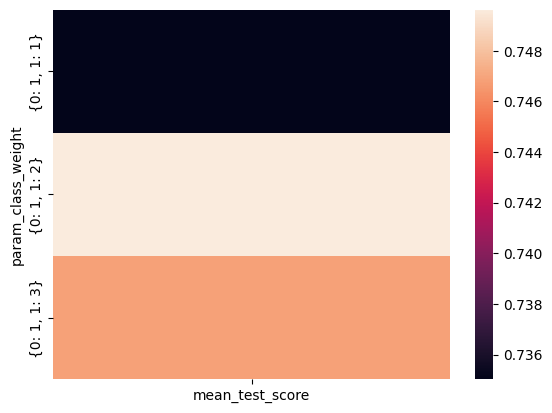

In [144]:
dt = pd.DataFrame(grid4.cv_results_)
dt.param_class_weight = dt.param_class_weight.astype(str)
table = pd.pivot_table(dt, values='mean_test_score', index='param_class_weight')

sns.heatmap(table)

In [145]:
grid4.best_score_

0.7496226634518516

In [148]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight={0: 1, 1: 2},
    criterion='entropy',
    max_depth=21,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=8,
    min_weight_fraction_leaf=0.0,
    n_estimators=80,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)


RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=21, min_samples_split=8, n_estimators=80)

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1036
           1       0.66      0.72      0.69       373

    accuracy                           0.83      1409
   macro avg       0.78      0.79      0.79      1409
weighted avg       0.83      0.83      0.83      1409

Accuracy   Score :  0.8275372604684174
Area under curve :  0.890042905793576 



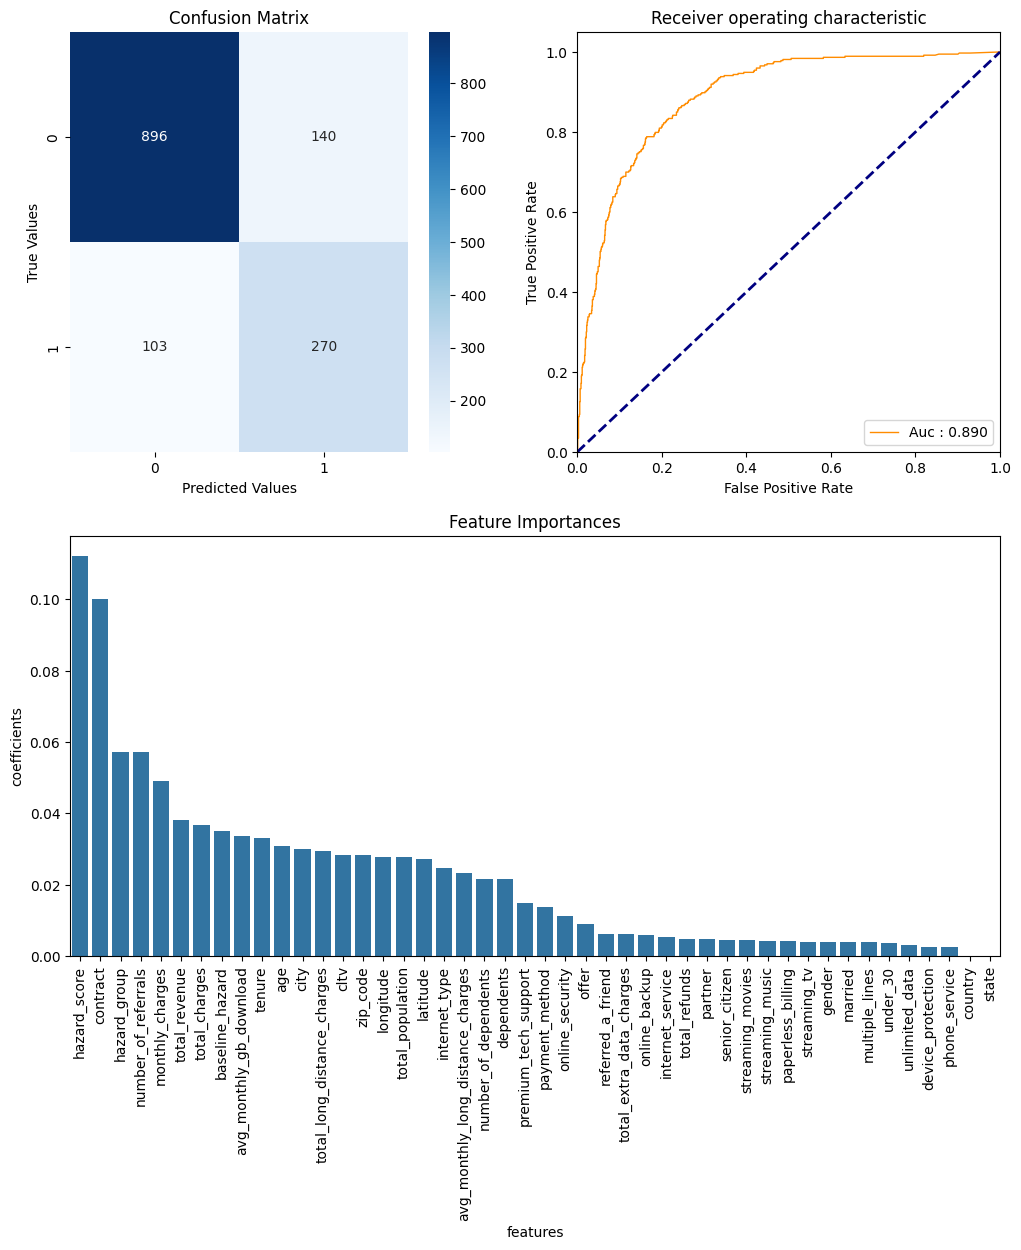

In [149]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


feature_names = list(train_x.columns)  # Lấy danh sách tên cột

churn_prediction(model, train_x, train_y, test_x, test_y, feature_names, "features")

In [150]:
import pickle
pickle.dump(model, open('model.pkl','wb'))